In [21]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split


### 1. Exploring the dataset

In [22]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data_df = pd.read_csv('../Resources/cleaned_df.csv')

# Review the DataFrame
lending_data_df.head()

,Duration,Cost of Travel(Entire Trip) in Euros,Mode of Travel,Stay,First Name,Last Name,Date of Birth,Address,Age,Sex,Nationality,Date of Travel,Year,Month,Day,Cost per Day,ZIP
0,1,20111.0,Flight,Hotel,Cristina,Fuentes,1914-06-14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,Non-Binary,Lao People's Democratic Republic,2022-09-13,2022,9,13,20111.000000,71371
1,5,29681.0,Car,Hotel,Patricia,Young,1923-09-25,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,Female,Gabon,2021-09-04,2021,9,4,5936.200000,27800
2,7,24950.0,Flight,Airbnb,Christina,Kirby,1935-01-02,"PSC 4600, Box 1237\nAPO AE 32510",36,Female,Syrian Arab Republic,2021-01-25,2021,1,25,3564.285714,32510
3,19,18676.0,Roadtrip,Airbnb,Michael,Hudson,1982-04-21,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,Non-Binary,Afghanistan,2022-01-28,2022,1,28,982.947368,26739
4,28,18899.0,Flight,Airbnb,Francisco,Hensley,1913-06-29,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,Non-Binary,Uruguay,2021-10-21,2021,10,21,674.964286,46541


In [23]:
# Review the DataFrame
lending_data_df.shape

(3000, 17)

In [24]:
# Review the DataFrame: Mode of Travel
unique_modes_of_travel = lending_data_df['Mode of Travel'].value_counts()
print(unique_modes_of_travel)

Mode of Travel
Car         551
Bus         516
Cruise      501
Train       498
Roadtrip    473
Flight      461
Name: count, dtype: int64


In [25]:
# Review the DataFrame: Dates
dates = lending_data_df['Date of Travel'].value_counts().sort_values(ascending=False)
print(dates)

# From June 2021 to July 2023

Date of Travel
2023-07-07    9
2020-09-20    8
2020-01-29    8
2022-09-07    8
2022-03-03    8
             ..
2021-03-31    1
2020-07-12    1
2022-02-15    1
2022-03-20    1
2021-06-19    1
Name: count, Length: 1194, dtype: int64


In [26]:
#Explore the datagrem: Date of Travel
grouped_date = lending_data_df.groupby('Date of Travel')


In [27]:
date_counts = grouped_date.size()
print(date_counts)

Date of Travel
2020-01-02    1
2020-01-03    4
2020-01-04    3
2020-01-05    3
2020-01-06    2
             ..
2023-08-22    4
2023-08-24    3
2023-08-25    1
2023-08-26    1
2023-08-27    1
Length: 1194, dtype: int64


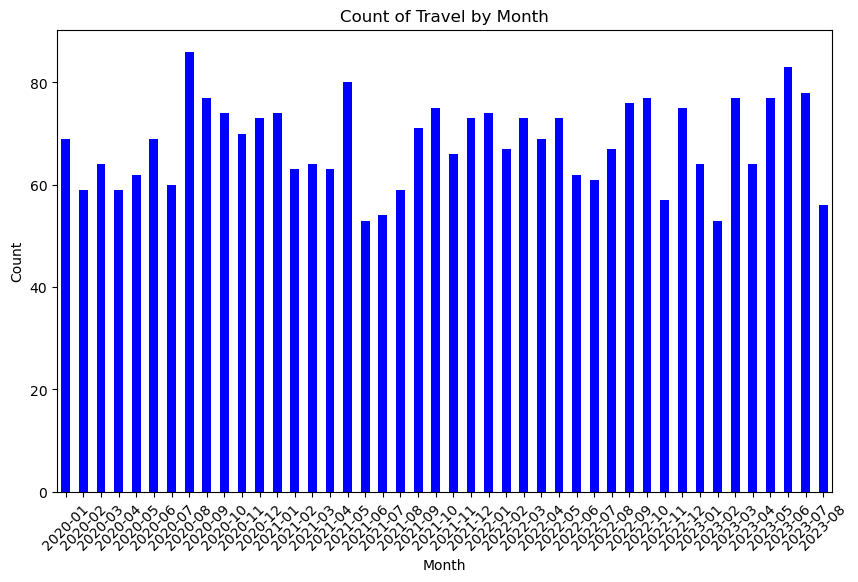

In [28]:
# Change 'Date of Travel' column in datetime format
lending_data_df['Date of Travel'] = pd.to_datetime(lending_data_df['Date of Travel'])

# Create a new column 'Month' to store the month information
lending_data_df['Month'] = lending_data_df['Date of Travel'].dt.strftime('%Y-%m')

# Group the data by month and count the occurrences
monthly_counts = lending_data_df['Month'].value_counts().sort_index()

# Create a plot
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='blue')
plt.title('Count of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [29]:
# Explore Mode of Travel
grouped_travelmode = lending_data_df.groupby('Mode of Travel')

In [30]:
travelmode_counts = grouped_travelmode.size()
print(travelmode_counts)

Mode of Travel
Bus         516
Car         551
Cruise      501
Flight      461
Roadtrip    473
Train       498
dtype: int64


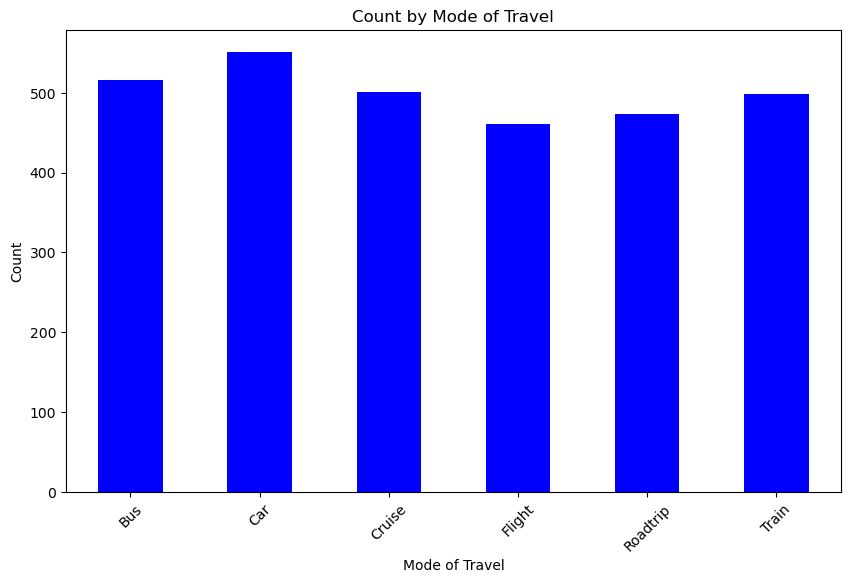

In [31]:
# Create a plot
plt.figure(figsize=(10, 6))
travelmode_counts.plot(kind='bar', color='blue')
plt.title('Count by Mode of Travel')
plt.xlabel('Mode of Travel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

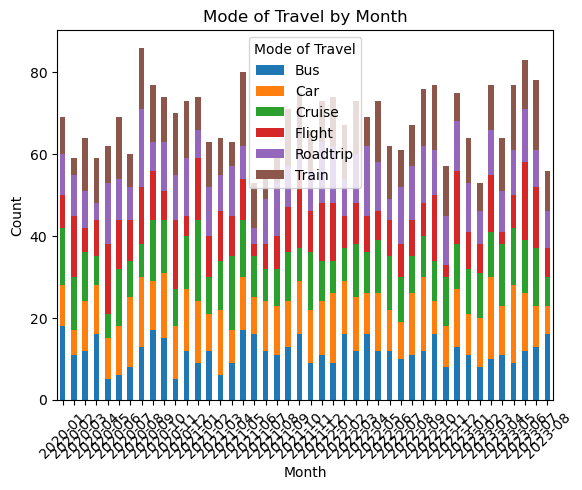

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your 'Date of Travel' column is not in datetime format
lending_data_df['Date of Travel'] = pd.to_datetime(lending_data_df['Date of Travel'])

# Create a new column 'Month' to store the month information
lending_data_df['Month'] = lending_data_df['Date of Travel'].dt.strftime('%Y-%m')

# Group the data by 'Month' and 'Mode of Travel', and count the occurrences
monthly_mode_counts = lending_data_df.groupby(['Month', 'Mode of Travel']).size().unstack(fill_value=0)

# Create a plot
plt.figure(figsize=(12, 6))
monthly_mode_counts.plot(kind='bar', stacked=True)
plt.title('Mode of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Mode of Travel')
plt.show()


<Figure size 1200x600 with 0 Axes>

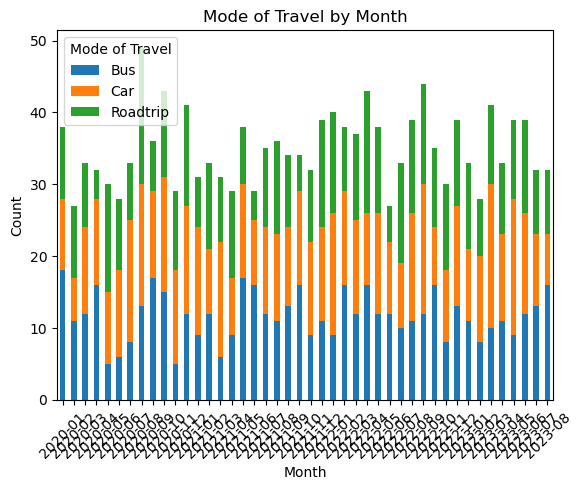

In [14]:
# Assuming your 'Date of Travel' column is not in datetime format
lending_data_df['Date of Travel'] = pd.to_datetime(lending_data_df['Date of Travel'])

# Create a new column 'Month' to store the month information
lending_data_df['Month'] = lending_data_df['Date of Travel'].dt.strftime('%Y-%m')

# Filter the DataFrame to include only certain modes of travel
modes_to_display = ['Bus', 'Car', 'Roadtrip']  # Replace with the modes you want to display
filtered_df = lending_data_df[lending_data_df['Mode of Travel'].isin(modes_to_display)]

# Group the filtered data by 'Month' and 'Mode of Travel', and count the occurrences
monthly_mode_counts = filtered_df.groupby(['Month', 'Mode of Travel']).size().unstack(fill_value=0)

# Create a plot
plt.figure(figsize=(12, 6))
monthly_mode_counts.plot(kind='bar', stacked=True)
plt.title('Mode of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Mode of Travel')
plt.show()


<Figure size 2400x1200 with 0 Axes>

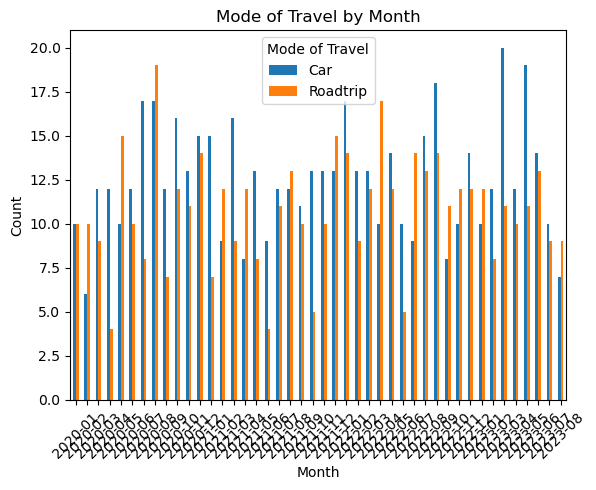

In [15]:
# Assuming your 'Date of Travel' column is not in datetime format
lending_data_df['Date of Travel'] = pd.to_datetime(lending_data_df['Date of Travel'])

# Create a new column 'Month' to store the month information
lending_data_df['Month'] = lending_data_df['Date of Travel'].dt.strftime('%Y-%m')

# Filter the DataFrame to include only certain modes of travel
modes_to_display = ['Car', 'Roadtrip']  # Replace with the modes you want to display
filtered_df = lending_data_df[lending_data_df['Mode of Travel'].isin(modes_to_display)]

# Pivot the filtered data to create separate columns for each mode
monthly_mode_counts = filtered_df.pivot_table(index='Month', columns='Mode of Travel', aggfunc='size', fill_value=0)

# Create a plot
plt.figure(figsize=(24, 12))
monthly_mode_counts.plot(kind='bar')
plt.title('Mode of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Mode of Travel')
plt.show()


<Figure size 2400x1200 with 0 Axes>

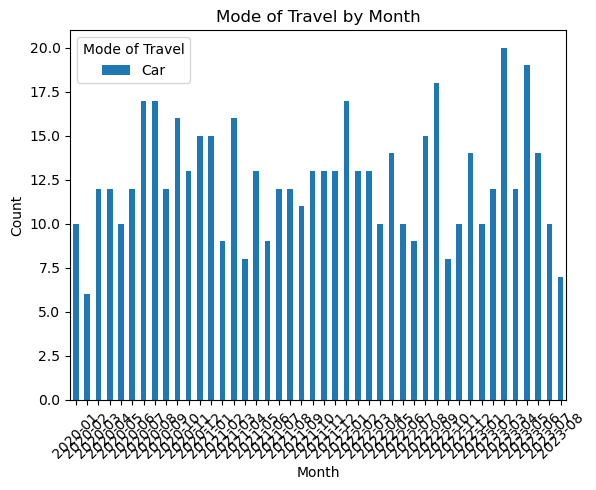

In [16]:
# Assuming your 'Date of Travel' column is not in datetime format
lending_data_df['Date of Travel'] = pd.to_datetime(lending_data_df['Date of Travel'])

# Create a new column 'Month' to store the month information
lending_data_df['Month'] = lending_data_df['Date of Travel'].dt.strftime('%Y-%m')

# Filter the DataFrame to include only certain modes of travel
modes_to_display = ['Car']  # Replace with the modes you want to display
filtered_df = lending_data_df[lending_data_df['Mode of Travel'].isin(modes_to_display)]

# Pivot the filtered data to create separate columns for each mode
monthly_mode_counts = filtered_df.pivot_table(index='Month', columns='Mode of Travel', aggfunc='size', fill_value=0)

# Create a plot
plt.figure(figsize=(24, 12))
monthly_mode_counts.plot(kind='bar')
plt.title('Mode of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Mode of Travel')
plt.show()

<Figure size 2400x1200 with 0 Axes>

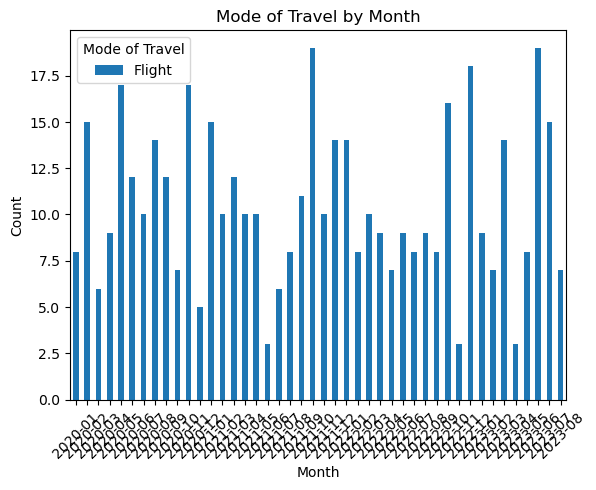

In [17]:
# Assuming your 'Date of Travel' column is not in datetime format
lending_data_df['Date of Travel'] = pd.to_datetime(lending_data_df['Date of Travel'])

# Create a new column 'Month' to store the month information
lending_data_df['Month'] = lending_data_df['Date of Travel'].dt.strftime('%Y-%m')

# Filter the DataFrame to include only certain modes of travel
modes_to_display = ['Flight']  # Replace with the modes you want to display
filtered_df = lending_data_df[lending_data_df['Mode of Travel'].isin(modes_to_display)]

# Pivot the filtered data to create separate columns for each mode
monthly_mode_counts = filtered_df.pivot_table(index='Month', columns='Mode of Travel', aggfunc='size', fill_value=0)

# Create a plot
plt.figure(figsize=(24, 12))
monthly_mode_counts.plot(kind='bar')
plt.title('Mode of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Mode of Travel')
plt.show()

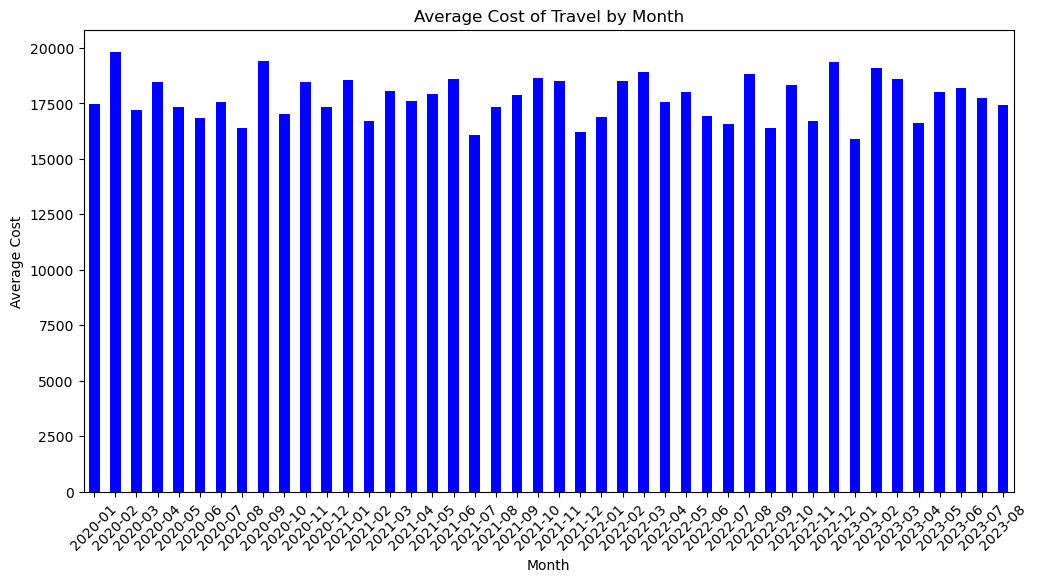

In [18]:
# Assuming your 'Date of Travel' column is not in datetime format
lending_data_df['Date of Travel'] = pd.to_datetime(lending_data_df['Date of Travel'])

# Create a new column 'Month' to store the month information
lending_data_df['Month'] = lending_data_df['Date of Travel'].dt.strftime('%Y-%m')

# Group the data by 'Month' and calculate the average cost for each month
monthly_average_cost = lending_data_df.groupby('Month')['Cost of Travel(Entire Trip)'].mean()

# Create a plot
plt.figure(figsize=(12, 6))
monthly_average_cost.plot(kind='bar', color='blue')
plt.title('Average Cost of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Average Cost')
plt.xticks(rotation=45)
plt.show()


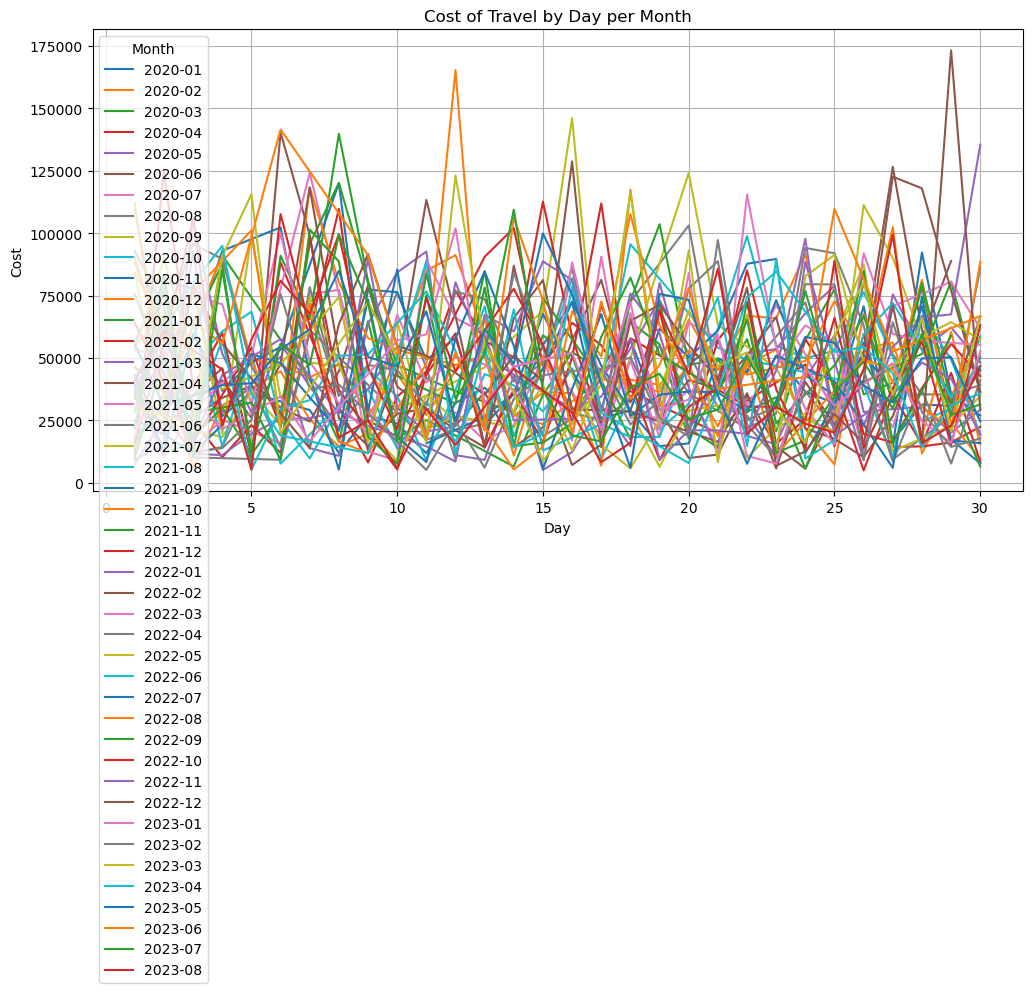

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your 'Date of Travel' column is not in datetime format
lending_data_df['Date of Travel'] = pd.to_datetime(lending_data_df['Date of Travel'])

# Create new columns 'Month' and 'Day' to store the month and day information
lending_data_df['Month'] = lending_data_df['Date of Travel'].dt.strftime('%Y-%m')

# Group the data by 'Month' and 'Day', and sum the 'Cost of Travel(Entire Trip)' for each day within each month
monthly_day_costs = lending_data_df.groupby(['Month', 'Duration'])['Cost of Travel(Entire Trip)'].sum()

# Reset the index to make 'Month' and 'Day' regular columns
monthly_day_costs = monthly_day_costs.reset_index()

# Create a plot
plt.figure(figsize=(12, 6))
for month, data in monthly_day_costs.groupby('Month'):
    plt.plot(data['Duration'], data['Cost of Travel(Entire Trip)'], label=month)

plt.title('Cost of Travel by Day per Month')
plt.xlabel('Day')
plt.ylabel('Cost')
plt.legend(title='Month')
plt.grid()
plt.show()


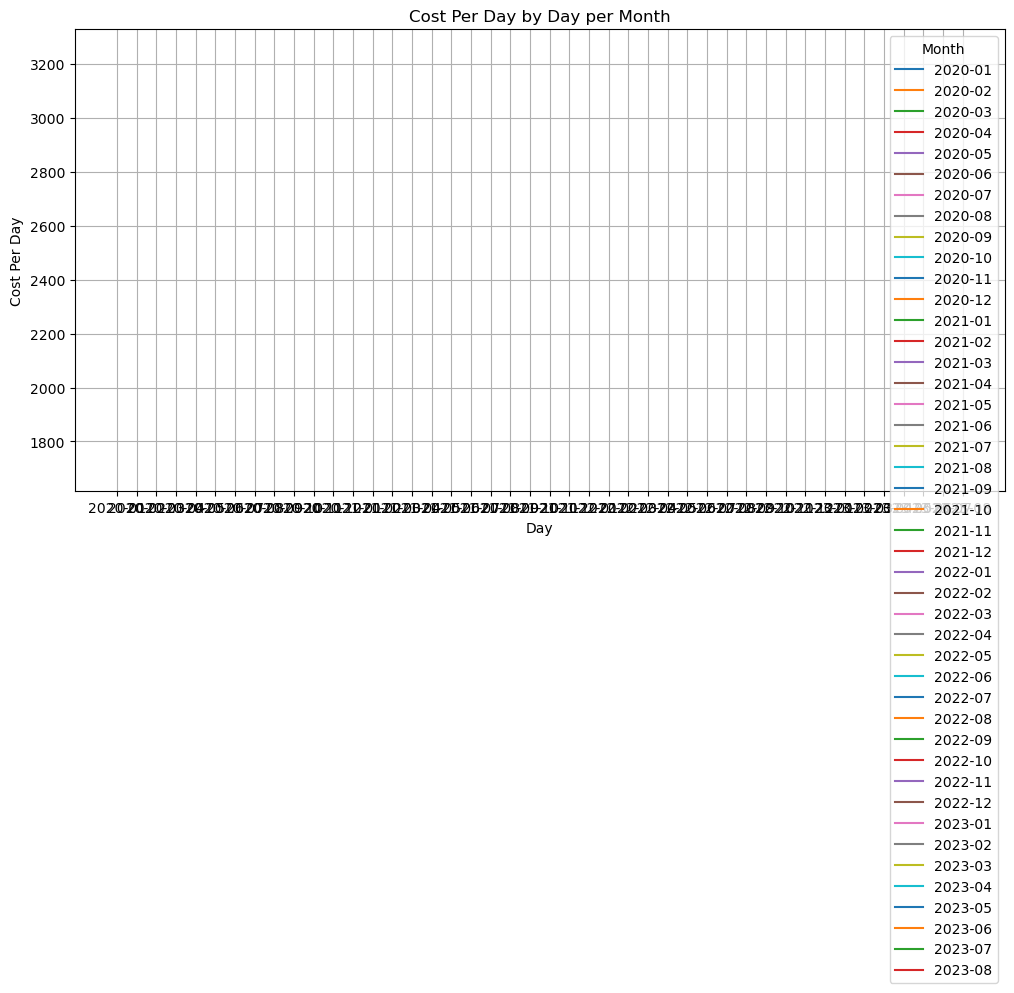

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your 'Date of Travel' column is not in datetime format
lending_data_df['Date of Travel'] = pd.to_datetime(lending_data_df['Date of Travel'])

# Create a new column 'Month' to store the month information without affecting the 'Day' column
lending_data_df['Month'] = lending_data_df['Date of Travel'].dt.strftime('%Y-%m')

# Calculate the cost per day by dividing the 'Cost of Travel(Entire Trip)' by 'Duration'
lending_data_df['Cost Per Day'] = lending_data_df['Cost of Travel(Entire Trip)'] / lending_data_df['Duration']

# Group the data by 'Month' and 'Day' and calculate the average cost per day for each day within each month
monthly_day_costs = lending_data_df.groupby(['Month'])['Cost Per Day'].mean().reset_index()

# Create a plot
plt.figure(figsize=(12, 6))
for month, data in monthly_day_costs.groupby('Month'):
    plt.plot(data['Month'], data['Cost Per Day'], label=month)

plt.title('Cost Per Day by Day per Month')
plt.xlabel('Day')
plt.ylabel('Cost Per Day')
plt.legend(title='Month')
plt.grid()
plt.show()




In [ ]:
# Explore Stay
unique_stay = lending_data_df['Stay'].value_counts()
print(unique_stay)

### Split the Data into Training and Testing Sets
Create the labels set (y) from the “Stay” column, and then create the features (X) DataFrame from the remaining columns.

In [ ]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data_df['Stay']

# Separate the X variable, the features
X = lending_data_df.drop("Stay", axis=1)

In [ ]:
# Review the y variable Series
y[:5]

In [ ]:
# Review the X variable DataFrame
X.head()

In [ ]:
# Check the balance of target values
y.value_counts()

### Split the data into training and testing datasets by using train_test_split.

In [ ]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

### Cleaning

In [16]:
# Split the date column into year, month, and day columns
lending_data_df[['year', 'month', 'day']] = lending_data_df['Date of Travel'].str.split('-', expand=True)

# Convert the new columns to integer type
lending_data_df['Year'] = lending_data_df['year'].astype(int)
lending_data_df['Month'] = lending_data_df['month'].astype(int)
lending_data_df['Day'] = lending_data_df['day'].astype(int)

# Drop columns 'Trip #no.' and 'Date of Travel' from the DataFrame
cleaned_df = lending_data_df.drop(['Trip #no.', 'Date of Travel', 'day', 'month', 'year'], axis=1)

# Rename the 'Cost of Travel(Entire Trip)' to 'Cost of Travel(Entire Trip) in Euros'
cleaned_df = cleaned_df.rename(columns={'Cost of Travel(Entire Trip)': 'Cost of Travel(Entire Trip) in Euros'})

# Display the modified DataFrame
cleaned_df.head()

,Duration,Cost of Travel(Entire Trip) in Euros,Mode of Travel,Stay,First Name,Last Name,Date of Birth,Address,Age,Sex,Nationality,Year,Month,Day
0,1,20111,Flight,Hotel,Cristina,Fuentes,1914-06-14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,Non-Binary,Lao People's Democratic Republic,2022,9,13
1,5,29681,Car,Hotel,Patricia,Young,1923-09-25,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,Female,Gabon,2021,9,4
2,7,24950,Flight,Airbnb,Christina,Kirby,1935-01-02,"PSC 4600, Box 1237\nAPO AE 32510",36,Female,Syrian Arab Republic,2021,1,25
3,19,18676,Roadtrip,Airbnb,Michael,Hudson,1982-04-21,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,Non-Binary,Afghanistan,2022,1,28
4,28,18899,Flight,Airbnb,Francisco,Hensley,1913-06-29,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,Non-Binary,Uruguay,2021,10,21


In [17]:
# Export the DataFrame to a CSV file
cleaned_df.to_csv('./Resources/cleaned_df.csv', index=False) 

### Other dataset

In [ ]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
crossfit_df = pd.read_csv('./Resources/crossfit.csv')

# Review the DataFrame
crossfit_df.head()